In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import sklearn_version

In [85]:
df = pd.read_csv('./data/vivino_data_241107.csv')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vintage_id               3675 non-null   int64  
 1   vintage_name             3675 non-null   object 
 2   vintage_year             3675 non-null   object 
 3   vintage_price            3675 non-null   int64  
 4   vintage_ratings_average  3675 non-null   float64
 5   vintage_ratings_count    3675 non-null   int64  
 6   vintage_wine_id          3675 non-null   int64  
 7   vintage_wine_name        3675 non-null   object 
 8   vintage_winery           3674 non-null   object 
 9   vintage_country          3675 non-null   object 
 10  vintage_region           3675 non-null   object 
 11  vintage_wine_type_id     3675 non-null   int64  
 12  acidity                  3555 non-null   float64
 13  fizziness                507 non-null    float64
 14  intensity               

In [4]:
df.shape

(3675, 22)

In [5]:
df['vintage_name'].nunique()

2024

In [86]:
# 중복된 행 찾기
duplicates = df[df.duplicated()]
duplicates.sort_values(by='vintage_id', ascending=False)
duplicates.head(5)

,vintage_id,vintage_name,vintage_year,vintage_price,vintage_ratings_average,vintage_ratings_count,vintage_wine_id,vintage_wine_name,vintage_winery,vintage_country,...,acidity,fizziness,intensity,sweetness,tannin,flavor,varietal_name,body_description,acidity_description,foods
1575,1201853,Cloudy Bay Te Koko Sauvignon Blanc 2005,2005,77627,4,35,1126958,Te Koko Sauvignon Blanc 2005,Cloudy Bay,New Zealand,...,4,NaN,3,2,NaN,citrus_fruit,Sauvignon Blanc,Light-bodied,High,"['Shellfish', 'Vegetarian', ""Goat's Milk Cheese""]"
2025,164942788,Warre's Heritage Ruby Port,N.V.,42264,4,3323,1718142,Heritage Ruby Port N.V.,Warre's,Portugal,...,3,NaN,5,5,NaN,oak,Ruby Port,Very full-bodied,Medium,"['Sweet desserts', 'Mature and hard cheese', '..."
2026,1330034,Château Vieux Lartigue Saint-Émilion Grand Cru...,2000,59083,4,3124,1159416,Saint-Émilion Grand Cru 2000,Château Vieux Lartigue,France,...,3,NaN,4,1,4,oak,Saint-Émilion,Full-bodied,Medium,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul..."
2027,1554044,Warre's King's Tawny Port,N.V.,42264,4,3083,1153717,King's Tawny Port N.V.,Warre's,Portugal,...,3,NaN,4,4,NaN,non_oak,Tawny Port,Very full-bodied,Medium,"['Sweet desserts', 'Mature and hard cheese', '..."
2028,176127589,Nederburg Pinotage 2003,2003,25013,4,2999,9520778,Pinotage 2003,Nederburg,South Africa,...,3,NaN,4,2,3,oak,Pinotage,Full-bodied,High,"['Beef', 'Game (deer, venison)', 'Poultry']"


In [7]:
duplicates['vintage_name'].nunique()

26

In [87]:
df = df.drop_duplicates(keep='first')

In [9]:
df.shape

(2024, 22)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2024 entries, 0 to 2024
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vintage_id               2024 non-null   int64  
 1   vintage_name             2024 non-null   object 
 2   vintage_year             2024 non-null   object 
 3   vintage_price            2024 non-null   int64  
 4   vintage_ratings_average  2024 non-null   float64
 5   vintage_ratings_count    2024 non-null   int64  
 6   vintage_wine_id          2024 non-null   int64  
 7   vintage_wine_name        2024 non-null   object 
 8   vintage_winery           2023 non-null   object 
 9   vintage_country          2024 non-null   object 
 10  vintage_region           2024 non-null   object 
 11  vintage_wine_type_id     2024 non-null   int64  
 12  acidity                  1970 non-null   float64
 13  fizziness                111 non-null    float64
 14  intensity                1970

In [11]:
df['vintage_wine_type_id'].unique()

array([ 2,  1,  4,  3, 24,  7, 25], dtype=int64)

In [12]:

df[df['vintage_wine_type_id']== 25] # drop 예정

,vintage_id,vintage_name,vintage_year,vintage_price,vintage_ratings_average,vintage_ratings_count,vintage_wine_id,vintage_wine_name,vintage_winery,vintage_country,...,acidity,fizziness,intensity,sweetness,tannin,flavor,varietal_name,body_description,acidity_description,foods
1448,1595873,Gran Duque d'Alba Gran Reserva,N.V.,60377,4.1,163,1157631,Gran Duque d'Alba Gran Reserva N.V.,NaN,Spain,...,NaN,NaN,NaN,NaN,NaN,dried_fruit,Saint-Estèphe,Full-bodied,High,[]


In [88]:
vintage_wine_type_id_dic = {
    1 : 'Red',
    2 : 'White',
    3 : 'Sparkling',
    4 : 'Rose',
    7 : 'Dessert',
    24 : 'Fortified',
    25 : 'Unknown'
}

In [89]:
df['vintage_wine_type_id'] = df['vintage_wine_type_id'].apply(lambda x: vintage_wine_type_id_dic[x])

In [90]:
df = df.rename(columns={'vintage_wine_type_id': 'vintage_wine_type'})

In [16]:
df['vintage_wine_type']

0           White
1             Red
2             Red
3            Rose
4       Sparkling
          ...    
2020          Red
2021        White
2022    Sparkling
2023        White
2024    Sparkling
Name: vintage_wine_type, Length: 2024, dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2024 entries, 0 to 2024
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vintage_id               2024 non-null   int64  
 1   vintage_name             2024 non-null   object 
 2   vintage_year             2024 non-null   object 
 3   vintage_price            2024 non-null   int64  
 4   vintage_ratings_average  2024 non-null   float64
 5   vintage_ratings_count    2024 non-null   int64  
 6   vintage_wine_id          2024 non-null   int64  
 7   vintage_wine_name        2024 non-null   object 
 8   vintage_winery           2023 non-null   object 
 9   vintage_country          2024 non-null   object 
 10  vintage_region           2024 non-null   object 
 11  vintage_wine_type        2024 non-null   object 
 12  acidity                  1970 non-null   float64
 13  fizziness                111 non-null    float64
 14  intensity                1970

## "foods" 컬럼 값 문자열의 나열로 변환

In [91]:
type(df['foods'][0])

str

In [92]:
# literal_eval: 문자열을 파이썬 코드로 파싱 처리
from ast import literal_eval

# str -> lst(dict) 변환
df['foods'] = df['foods'].apply(literal_eval)

In [93]:
type(df['foods'][0])

list

In [94]:
df['foods'] = df['foods'].apply(lambda food: ', '.join(food) if isinstance(food, list) else food)

In [95]:
type(df['foods'][0])

str

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vintage_id               2024 non-null   object 
 1   vintage_name             2024 non-null   object 
 2   vintage_year             2024 non-null   object 
 3   vintage_price            2024 non-null   object 
 4   vintage_ratings_average  2024 non-null   float64
 5   vintage_ratings_count    2024 non-null   object 
 6   vintage_wine_id          2024 non-null   object 
 7   vintage_wine_name        2024 non-null   object 
 8   vintage_winery           2023 non-null   object 
 9   vintage_country          2024 non-null   object 
 10  vintage_region           2024 non-null   object 
 11  vintage_wine_type        2024 non-null   object 
 12  acidity                  1970 non-null   float64
 13  fizziness                111 non-null    float64
 14  intensity               

In [57]:
df.describe()

,vintage_ratings_average,acidity,fizziness,intensity,sweetness,tannin
count,2024,1970,111,1970,1859,1409
mean,4,4,4,4,2,3
std,0,1,1,1,1,1
min,4,2,1,1,1,2
25%,4,3,4,3,2,3
50%,4,4,4,4,2,4
75%,4,4,4,4,2,4
max,5,5,4,5,5,5


In [24]:
# DataFrame을 CSV 파일로 저장
# df.to_csv('data_cleansed.csv', index=False, encoding='utf-8-sig')
# print("DataFrame이 data_cleansed.csv로 저장되었습니다.")

DataFrame이 data_cleansed.csv로 저장되었습니다.


## EDA

In [97]:
df['fizziness'].fillna(0, inplace=True)

C:\Users\playdata2\AppData\Local\Temp\ipykernel_10636\1762943554.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fizziness'].fillna(0, inplace=True)


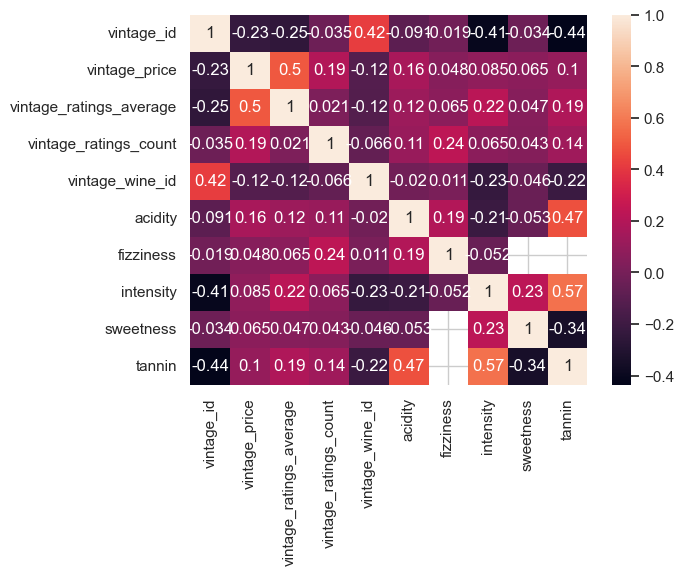

In [98]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.show()

<Axes: xlabel='body_description', ylabel='acidity_description'>

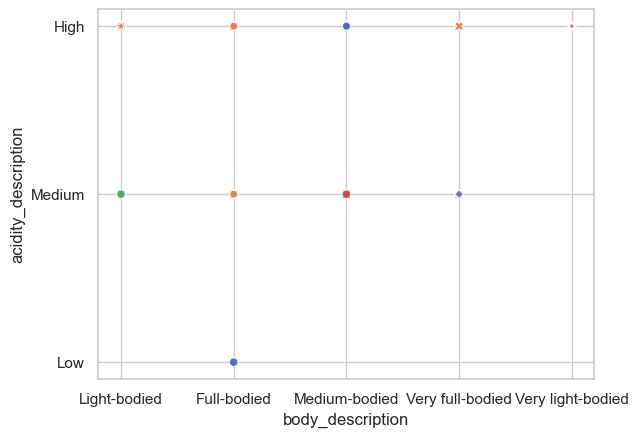

In [26]:
sns.set(style="whitegrid")
    
sns.scatterplot(data=df, x='body_description', y='acidity_description', hue='vintage_wine_type', style='foods', legend=False)

<Axes: xlabel='acidity', ylabel='tannin'>

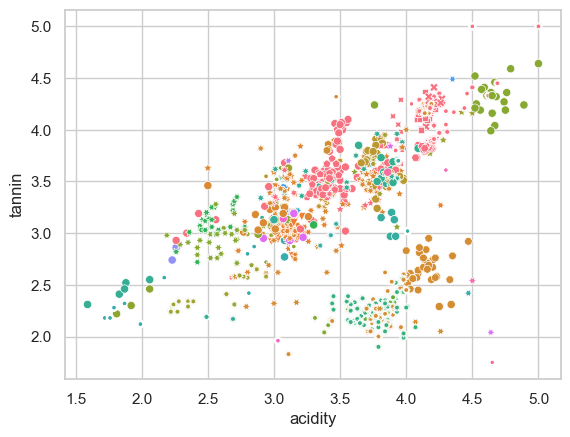

In [102]:
sns.set(style="whitegrid")

sns.scatterplot(data=df, x='acidity', y='tannin', hue='foods', style='varietal_name', legend=False)

# 유사한 음식과 페어링 되는 와인 추천

In [28]:
df[df['varietal_name'] == 'Riesling']['foods'].unique()

array(['Pork, Shellfish, Spicy food, Poultry, Cured Meat',
       'Pork, Rich fish (salmon, tuna etc), Spicy food, Vegetarian, Cured Meat',
       ''], dtype=object)

### 벡터 변환

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))
foods_vec = count_vectorizer.fit_transform(df['foods'])
foods_vec.shape

(2024, 158)

In [30]:
foods_vec_vocab = count_vectorizer.vocabulary_
foods_vec_vocab

{'pork': 95,
 'shellfish': 115,
 'spicy': 132,
 'food': 51,
 'poultry': 103,
 'cured': 27,
 'meat': 77,
 'pork shellfish': 100,
 'shellfish spicy': 122,
 'spicy food': 133,
 'food poultry': 54,
 'poultry cured': 106,
 'cured meat': 28,
 'beef': 10,
 'lamb': 67,
 'game': 59,
 'deer': 29,
 'venison': 150,
 'beef lamb': 12,
 'lamb game': 68,
 'game deer': 60,
 'deer venison': 30,
 'venison poultry': 155,
 'vegetarian': 143,
 'shellfish vegetarian': 123,
 'vegetarian poultry': 149,
 'rich': 111,
 'fish': 44,
 'salmon': 113,
 'tuna': 136,
 'etc': 39,
 'mild': 78,
 'and': 0,
 'soft': 130,
 'cheese': 18,
 'pork rich': 99,
 'rich fish': 112,
 'fish salmon': 50,
 'salmon tuna': 114,
 'tuna etc': 137,
 'etc shellfish': 41,
 'shellfish mild': 120,
 'mild and': 79,
 'and soft': 3,
 'soft cheese': 131,
 'sweet': 134,
 'desserts': 31,
 'mature': 75,
 'hard': 63,
 'blue': 16,
 'sweet desserts': 135,
 'desserts mature': 35,
 'mature and': 76,
 'and hard': 1,
 'hard cheese': 64,
 'cheese blue': 20,
 'b

In [31]:
foods_vec_feature_names = pd.DataFrame(count_vectorizer.get_feature_names_out())
print(count_vectorizer.get_feature_names_out())

['and' 'and hard' 'and snacks' 'and soft' 'any' 'any junk' 'aperitif'
 'aperitif cured' 'appetizers' 'appetizers and' 'beef' 'beef game'
 'beef lamb' 'beef pasta' 'beef veal' 'beef vegetarian' 'blue'
 'blue cheese' 'cheese' 'cheese aperitif' 'cheese blue' 'cheese cured'
 'cheese fruity' 'cheese goat' 'cheese lean' 'cheese poultry'
 'cheese vegetarian' 'cured' 'cured meat' 'deer' 'deer venison' 'desserts'
 'desserts aperitif' 'desserts appetizers' 'desserts blue'
 'desserts mature' 'desserts mild' 'do' 'do appetizers' 'etc' 'etc mature'
 'etc shellfish' 'etc spicy' 'etc vegetarian' 'fish' 'fish aperitif'
 'fish cured' 'fish goat' 'fish mild' 'fish mushrooms' 'fish salmon'
 'food' 'food appetizers' 'food mushrooms' 'food poultry'
 'food vegetarian' 'food will' 'fruity' 'fruity desserts' 'game'
 'game deer' 'goat' 'goat milk' 'hard' 'hard cheese' 'junk' 'junk food'
 'lamb' 'lamb game' 'lamb pork' 'lamb poultry' 'lamb veal'
 'lamb vegetarian' 'lean' 'lean fish' 'mature' 'mature and' 'meat'

### 코사인 유사도 측정

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

foods_sim = cosine_similarity(foods_vec, foods_vec)
print(foods_sim[:5])

[[1.         0.0836242  0.0836242  ... 0.         0.         0.        ]
 [0.0836242  1.         1.         ... 0.         0.         0.        ]
 [0.0836242  1.         1.         ... 0.         0.         0.        ]
 [0.41931393 0.11396058 0.11396058 ... 0.         0.         0.        ]
 [0.12104551 0.         0.         ... 0.08247861 0.         0.08247861]]


In [33]:
# 각 영화별 장르 유사도 높은 영화 추출
wine_idx_by_foods_sim = foods_sim.argsort(axis=1)[:, ::-1]
print(wine_idx_by_foods_sim[:5])

[[   0 1267 1370 ...  513 1275 2023]
 [ 604  235 1098 ... 1245 1237 2023]
 [ 604  235 1098 ... 1245 1237 2023]
 [1826    3 1011 ...  946  945 2023]
 [ 523 1254  393 ... 1784 1042  799]]


In [34]:
# 0번 와인 1896 Riesling 2023 와 장르 유사도 높은 와인
wine_idx = 0
df.iloc[wine_idx_by_foods_sim[wine_idx, :10]]

,vintage_id,vintage_name,vintage_year,vintage_price,vintage_ratings_average,vintage_ratings_count,vintage_wine_id,vintage_wine_name,vintage_winery,vintage_country,...,acidity,fizziness,intensity,sweetness,tannin,flavor,varietal_name,body_description,acidity_description,foods
0,177404982,Carl Loewen 1896 Riesling 2023,2023,82045,5.0,115,1945087,1896 Riesling 2023,Carl Loewen,Germany,...,4.61,NaN,3.32,2.05,NaN,tree_fruit,Riesling,Light-bodied,High,"Pork, Shellfish, Spicy food, Poultry, Cured Meat"
1267,15852718,Fritz Haag Riesling Trocken Brauneberger Juffe...,2007,107815,4.1,2501,2242419,Riesling Trocken Brauneberger Juffer Sonnenuhr...,Fritz Haag,Germany,...,4.41,NaN,3.16,1.91,NaN,earth,Riesling,Light-bodied,High,"Pork, Shellfish, Spicy food, Poultry, Cured Meat"
1370,171254236,Amisfield Lowburn Terrace Riesling 2022,2022,32885,4.1,352,86254,Lowburn Terrace Riesling 2022,Amisfield,New Zealand,...,4.38,NaN,2.53,2.48,NaN,tree_fruit,Riesling,Light-bodied,High,"Pork, Shellfish, Spicy food, Poultry, Cured Meat"
1431,143110020,Von Winning Ruppertsberger Reiterpfad Riesling...,2015,68959,4.1,194,1577058,Ruppertsberger Reiterpfad Riesling 2015,Von Winning,Germany,...,4.48,NaN,3.23,1.75,NaN,earth,Riesling,Light-bodied,High,"Pork, Shellfish, Spicy food, Poultry, Cured Meat"
1481,168894912,Pegasus Bay Bel Canto Dry Riesling 2020,2020,32885,4.1,109,1261670,Bel Canto Dry Riesling 2020,Pegasus Bay,New Zealand,...,4.35,NaN,2.87,1.85,NaN,earth,Riesling,Light-bodied,High,"Pork, Shellfish, Spicy food, Poultry, Cured Meat"
1488,156292767,Prinz Salm Two Princes Riesling 2017,2017,55201,4.1,102,2705003,Two Princes Riesling 2017,Prinz Salm,Germany,...,4.52,NaN,2.83,2.45,NaN,tree_fruit,Riesling,Light-bodied,High,"Pork, Shellfish, Spicy food, Poultry, Cured Meat"
1521,7058,Argyle Minus Five Riesling 2007,2007,62533,4.1,65,6417,Minus Five Riesling 2007,Argyle,United States,...,3.99,NaN,2.50,2.41,NaN,tree_fruit,Riesling,Medium-bodied,High,"Pork, Shellfish, Spicy food, Poultry, Cured Meat"
1537,177404970,Carl Loewen Alte Reben Riesling Trocken 2023,2023,20138,4.1,52,1175944,Alte Reben Riesling Trocken 2023,Carl Loewen,Germany,...,4.40,NaN,3.03,2.00,NaN,tree_fruit,Riesling,Light-bodied,High,"Pork, Shellfish, Spicy food, Poultry, Cured Meat"
1595,143139629,Deinhard Piesporter Riesling 2016,2016,25876,4.1,29,1155969,Piesporter Riesling 2016,Deinhard,Germany,...,4.76,NaN,2.87,2.34,NaN,tree_fruit,Riesling,Light-bodied,High,"Pork, Shellfish, Spicy food, Poultry, Cured Meat"
1619,7851738,Schloss Johannisberg Gelblack Riesling Trocken...,2006,46576,4.0,13406,2130558,Gelblack Riesling Trocken 2006,Schloss Johannisberg,Germany,...,4.63,NaN,2.97,1.66,NaN,tree_fruit,Riesling,Light-bodied,High,"Pork, Shellfish, Spicy food, Poultry, Cured Meat"


## 새로운 데이터 입력 및 유사도 분석

In [35]:
df_new_row = pd.DataFrame({
    'vintage_id': [None],
    'vintage_name': [None],
    'vintage_year': [None],
    'vintage_price': [None],
    'vintage_ratings_average': [None],
    'vintage_ratings_count': [None],
    'vintage_wine_id': [None],
    'vintage_wine_name': [None],
    'vintage_winery': [None],
    'vintage_country': [None],
    'vintage_region': [None],
    'vintage_wine_type': [None],
    'acidity': [None],
    'fizziness': [None],
    'intensity': [None],
    'sweetness': [None],
    'tannin': [None],
    'flavor': [None],
    'varietal_name': [None],
    'body_description': [None],
    'acidity_description': [None],
    'foods': [['raw fish, lemon, pasta']] 
})


In [36]:
# literal_eval: 문자열을 파이썬 코드로 파싱 처리
# from ast import literal_eval
# 
# # str -> lst(dict) 변환
# df_new_row['foods'] = df_new_row['foods'].apply(literal_eval)

df_new_row['foods'] = df_new_row['foods'].apply(lambda food: ', '.join(food) if isinstance(food, list) else food)

In [37]:
df = pd.concat([df, df_new_row], ignore_index=True)

C:\Users\playdata2\AppData\Local\Temp\ipykernel_10636\1354684799.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_new_row], ignore_index=True)


In [38]:
df.tail()

,vintage_id,vintage_name,vintage_year,vintage_price,vintage_ratings_average,vintage_ratings_count,vintage_wine_id,vintage_wine_name,vintage_winery,vintage_country,...,acidity,fizziness,intensity,sweetness,tannin,flavor,varietal_name,body_description,acidity_description,foods
2020,164818931,Château Olivier Pessac-Léognan Blanc (Grand Cr...,1964,316991,3.9,2033,87425,Pessac-Léognan Blanc (Grand Cru Classé de Grav...,Château Olivier,France,...,3.17,NaN,3.80,1.96,NaN,citrus_fruit,White,Medium-bodied,High,"Pork, Vegetarian, Poultry, Appetizers and snac..."
2021,23213221,Costaripa Mattia Vezzola Brut,N.V.,37964,3.9,2006,3429423,Mattia Vezzola Brut N.V.,Costaripa,Italy,...,3.29,3.82,2.89,NaN,NaN,tree_fruit,Sparkling,Medium-bodied,Medium,"Appetizers and snacks, Aperitif"
2022,169670734,Pegasus Bay Sauvignon - Sémillon 2021,2021,23017,3.9,1905,16114,Sauvignon - Sémillon 2021,Pegasus Bay,New Zealand,...,NaN,NaN,NaN,NaN,NaN,citrus_fruit,Sparkling,Medium-bodied,Medium,
2023,4046901,Abbazia di S. Gaudenzio Moscato Dolce,N.V.,25876,3.9,1822,2115561,Moscato Dolce N.V.,Abbazia di S. Gaudenzio,Italy,...,3.01,3.94,3.02,NaN,NaN,tree_fruit,Sparkling,Medium-bodied,Medium,"Appetizers and snacks, Aperitif"
2024,None,None,None,None,NaN,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,None,None,None,None,"raw fish, lemon, pasta"


### 벡터 변환

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,3))
foods_vec = count_vectorizer.fit_transform(df['foods'])
foods_vec.shape

(2025, 342)

In [40]:
foods_vec_vocab = count_vectorizer.vocabulary_
foods_vec_vocab

{'pork': 203,
 'shellfish': 248,
 'spicy': 285,
 'food': 107,
 'poultry': 223,
 'cured': 57,
 'meat': 167,
 'pork shellfish': 213,
 'shellfish spicy': 261,
 'spicy food': 286,
 'food poultry': 112,
 'poultry cured': 228,
 'cured meat': 58,
 'pork shellfish spicy': 216,
 'shellfish spicy food': 262,
 'spicy food poultry': 289,
 'food poultry cured': 113,
 'poultry cured meat': 229,
 'beef': 20,
 'lamb': 141,
 'game': 125,
 'deer': 59,
 'venison': 329,
 'beef lamb': 23,
 'lamb game': 142,
 'game deer': 126,
 'deer venison': 60,
 'venison poultry': 337,
 'beef lamb game': 24,
 'lamb game deer': 143,
 'game deer venison': 127,
 'deer venison poultry': 65,
 'vegetarian': 313,
 'shellfish vegetarian': 263,
 'vegetarian poultry': 324,
 'pork shellfish vegetarian': 217,
 'shellfish vegetarian poultry': 267,
 'rich': 242,
 'fish': 92,
 'salmon': 245,
 'tuna': 297,
 'etc': 80,
 'mild': 168,
 'and': 0,
 'soft': 279,
 'cheese': 39,
 'pork rich': 211,
 'rich fish': 243,
 'fish salmon': 105,
 'salmo

In [41]:
foods_vec_feature_names = pd.DataFrame(count_vectorizer.get_feature_names_out())
foods_vec_feature_names

,0
0,and
1,and hard
2,and hard cheese
3,and snacks
4,and snacks aperitif
...,...
337,venison poultry
338,venison poultry mild
339,will
340,will do


### 코사인 유사도 측정

In [42]:
foods_sim = cosine_similarity(foods_vec, foods_vec)
# foods_sim[:10]

In [43]:
wine_idx_by_foods_sim = foods_sim.argsort(axis=1)[:, ::-1]
print(wine_idx_by_foods_sim[:5])

[[   0  796 1881 ...  877  876 2024]
 [ 775 1532  301 ...  948  938 1012]
 [ 775 1532  301 ...  948  938 1012]
 [1826    3 1011 ...  420 1088 2024]
 [ 657  411  222 ... 1004 1005  765]]


In [44]:
#  추가된 와인 과 푸드 유사도 높은 와인
wine_idx = len(df) -1
df_recommended = df.iloc[wine_idx_by_foods_sim[wine_idx, :]]
df_recommended

,vintage_id,vintage_name,vintage_year,vintage_price,vintage_ratings_average,vintage_ratings_count,vintage_wine_id,vintage_wine_name,vintage_winery,vintage_country,...,acidity,fizziness,intensity,sweetness,tannin,flavor,varietal_name,body_description,acidity_description,foods
2024,None,None,None,None,NaN,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,None,None,None,None,"raw fish, lemon, pasta"
1016,152659861,Domaine Les Aurelles Aurel Blanc 2017,2017,192686,4.2,213,2424533,Aurel Blanc 2017,Domaine Les Aurelles,France,...,2.93,NaN,3.91,2.07,NaN,earth,White,Full-bodied,High,"Pasta, Vegetarian, Poultry, Lean fish, Aperitif"
1852,174954957,Domaine Lafage Miraflors Rosé 2023,2023,16334,4.0,101,1614560,Miraflors Rosé 2023,Domaine Lafage,France,...,3.60,NaN,2.86,1.30,NaN,red_fruit,Rosé,Full-bodied,High,"Pasta, Vegetarian, Appetizers and snacks, Lean..."
176,29884594,La Grange des Pères Vin de Pays de l'Hérault 2015,2015,447517,4.5,772,779852,Vin de Pays de l'Hérault 2015,La Grange des Pères,France,...,3.69,NaN,3.88,1.81,3.47,earth,Red,Full-bodied,High,"Beef, Pasta, Veal"
1589,161643186,Sartarelli Balciana 2019,2019,62712,4.1,32,85568,Balciana 2019,Sartarelli,Italy,...,3.86,NaN,3.61,2.42,NaN,earth,White,Medium-bodied,High,"Pasta, Vegetarian, Appetizers and snacks, Lean..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,159509471,Trinity Hill Homage Syrah 2019,2019,131564,4.2,25,17607,Homage Syrah 2019,Trinity Hill,New Zealand,...,3.54,NaN,3.82,1.61,3.64,black_fruit,Syrah,Full-bodied,High,"Beef, Lamb, Game (deer, venison), Poultry"
1202,159789928,Mills Reef Elspeth Syrah 2018,2018,41108,4.2,25,1257519,Elspeth Syrah 2018,Mills Reef,New Zealand,...,3.39,NaN,3.84,1.77,3.42,black_fruit,Syrah,Full-bodied,High,"Beef, Lamb, Game (deer, venison), Poultry"
1207,2230598,Château Phélan Ségur Saint-Estèphe 1973,1973,246134,4.1,29845,98166,Saint-Estèphe 1973,Château Phélan Ségur,France,...,4.20,NaN,4.22,1.62,4.27,oak,Saint-Estèphe,Full-bodied,High,"Beef, Lamb, Game (deer, venison), Poultry"
1208,15780559,Château Branaire-Ducru Saint-Julien (Grand Cru...,1959,615335,4.1,26256,1172272,Saint-Julien (Grand Cru Classé) 1959,Château Branaire-Ducru,France,...,4.19,NaN,3.79,1.61,3.91,oak,Saint-Julien,Full-bodied,High,"Beef, Lamb, Game (deer, venison), Poultry"


In [45]:
# 가중 평점 계산에 필요한 변수
C = df['vintage_ratings_average'].mean() # 전체 영화 평점
m = df['vintage_ratings_count'].quantile(0.5) # 최소 투표 횟수

def weighted_rating(df):
    v = df['vintage_ratings_count'] # 개별 영화 투표 수
    R = df['vintage_ratings_average'] # 개별 영화 평점
    return (v/(v+m)) * R + (m/(v+m)) * C

df['weighted_ratings'] = weighted_rating(df)
df.sort_values(by='weighted_ratings', ascending=False)

,vintage_id,vintage_name,vintage_year,vintage_price,vintage_ratings_average,vintage_ratings_count,vintage_wine_id,vintage_wine_name,vintage_winery,vintage_country,...,fizziness,intensity,sweetness,tannin,flavor,varietal_name,body_description,acidity_description,foods,weighted_ratings
1,1510217,Château Haut-Brion Pessac-Léognan (Premier Gra...,1989,3244496,4.8,1538,1152755,Pessac-Léognan (Premier Grand Cru Classé) 1989,Château Haut-Brion,France,...,NaN,4.08,1.67,4.23,oak,Pessac-Léognan,Full-bodied,High,"Beef, Lamb, Game (deer, venison), Poultry",4.720251
2,2611979,Château Latour Grand Vin Pauillac (Premier Gra...,1982,2759686,4.8,1445,1655970,Grand Vin Pauillac (Premier Grand Cru Classé) ...,Château Latour,France,...,NaN,4.12,1.68,4.13,oak,Pauillac,Full-bodied,High,"Beef, Lamb, Game (deer, venison), Poultry",4.715873
12,2267725,Château d'Yquem Sauternes 1934,1934,2921284,4.7,49899,1153863,Sauternes 1934,Château d'Yquem,France,...,NaN,4.67,4.87,NaN,earth,Sauternes,Full-bodied,High,"Fruity desserts, Blue cheese",4.697655
13,156103569,Antinori Tignanello 2018,2018,191090,4.7,9409,1652,Tignanello 2018,Antinori,Italy,...,NaN,3.43,1.72,2.99,oak,Red,Medium-bodied,Medium,"Beef, Lamb, Veal, Poultry, Cured Meat",4.687822
14,3909022,Château Mouton Rothschild Pauillac (Premier Gr...,1986,1178461,4.7,2767,1684223,Pauillac (Premier Grand Cru Classé) 1986,Château Mouton Rothschild,France,...,NaN,4.05,1.72,4.10,oak,Pauillac,Full-bodied,High,"Beef, Lamb, Game (deer, venison), Poultry",4.661004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,164942655,Ayala Brut Majeur Champagne,N.V.,67423,3.9,14030,12318,Brut Majeur Champagne N.V.,Ayala,France,...,4.26,3.65,NaN,NaN,citrus_fruit,Champagne,Medium-bodied,High,"Pork, Rich fish (salmon, tuna etc), Shellfish,...",3.905714
1973,5995082,Château de Camensac Haut-Médoc (Grand Cru Clas...,1937,671275,3.9,18821,63094,Haut-Médoc (Grand Cru Classé) 1937,Château de Camensac,France,...,NaN,4.16,1.50,4.16,oak,Haut-Médoc,Full-bodied,High,"Beef, Lamb, Game (deer, venison)",3.904278
1972,2656200,Decoy California Red Wine 2004,2004,72883,3.9,21773,1128171,California Red Wine 2004,Decoy,United States,...,NaN,4.68,1.69,3.24,oak,Red Blend,Full-bodied,High,"Beef, Lamb, Veal, Poultry",3.903705
1971,4250149,Wente Vineyards Morning Fog Chardonnay 2003,2003,29326,3.9,29927,1720,Morning Fog Chardonnay 2003,Wente Vineyards,United States,...,NaN,4.69,2.68,NaN,oak,Chardonnay,Full-bodied,Medium,"Pork, Rich fish (salmon, tuna etc), Vegetarian...",3.902704


In [46]:
#  추가된 와인 과 푸드 유사도 높은 와인
wine_idx = len(df) - 1
recommended_idx = wine_idx_by_foods_sim[wine_idx, : 100]
recommended_idx = recommended_idx[recommended_idx != wine_idx]
df_recommended = df.iloc[recommended_idx]

In [47]:
max_price = 100_000
min_price = 10_000

df_recommended_price_range = df_recommended[(df_recommended['vintage_price'] > min_price) & (df_recommended['vintage_price'] < max_price)]

In [48]:
df_recommended_ratings = df_recommended_price_range.sort_values(by='weighted_ratings', ascending=False)
# sort_values(by='vintage_price', ascending=True))

In [65]:
selected_columns = ['vintage_wine_name', 'vintage_price', 'vintage_country', 'vintage_wine_type', 'varietal_name', 'flavor','foods']
df_selected = df_recommended_ratings[selected_columns].reset_index(drop=True)
df_selected.head(10)

,vintage_wine_name,vintage_price,vintage_country,vintage_wine_type,varietal_name,flavor,foods
0,Balciana 2019,62712,Italy,White,White,earth,"Pasta, Vegetarian, Appetizers and snacks, Lean..."
1,Solen 2016,55940,France,Red,Red,black_fruit,"Beef, Pasta, Veal"
2,Narses 2021,17826,Italy,Red,Red,black_fruit,"Beef, Pasta, Lamb"
3,Tìade Etna Rosso 2017,34548,Italy,Red,Red,black_fruit,"Beef, Pasta, Lamb"
4,Riserva Trebbiano 2010,97034,Italy,White,White,oak,"Pasta, Vegetarian, Appetizers and snacks, Lean..."
5,Maroccoli Syrah 2019,32400,Italy,Red,Red,oak,"Beef, Pasta, Lamb"
6,Chardonnay 2011,97034,Italy,White,White,oak,"Pasta, Vegetarian, Appetizers and snacks, Lean..."
7,Haut Vallée du Gassac Rouge 2003,81940,France,Red,Red,oak,"Beef, Pasta, Veal"
8,Miraflors Rosé 2023,16334,France,Rose,Rosé,red_fruit,"Pasta, Vegetarian, Appetizers and snacks, Lean..."
9,Castello della Sala San Giovanni della Sala Cl...,21182,Italy,White,White,tree_fruit,"Pasta, Vegetarian, Appetizers and snacks, Lean..."


In [50]:
pd.options.display.float_format = '{:.0f}'.format
df['vintage_price'].describe()

count      2024
unique      806
top       77627
freq         28
Name: vintage_price, dtype: int64

In [51]:
df.columns

Index(['vintage_id', 'vintage_name', 'vintage_year', 'vintage_price',
       'vintage_ratings_average', 'vintage_ratings_count', 'vintage_wine_id',
       'vintage_wine_name', 'vintage_winery', 'vintage_country',
       'vintage_region', 'vintage_wine_type', 'acidity', 'fizziness',
       'intensity', 'sweetness', 'tannin', 'flavor', 'varietal_name',
       'body_description', 'acidity_description', 'foods', 'weighted_ratings'],
      dtype='object')

In [79]:
from catboost import CatBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

# 데이터 불러오기
# wine_data.csv에는 'name', 'variety', 'flavor', 'acidity', 'sweetness', 'tannin', 'body' 컬럼이 포함되어 있어야 합니다.
data = pd.read_csv('./data/data_cleansed.csv')
data.fillna(value=0, inplace=True)

# 입력 특징과 타겟 설정 (입력값은 산도, 당도, 탄닌, 바디감)
features = ['acidity','fizziness','intensity', 'sweetness', 'tannin']
X = data[features]
y = data[features]  # 추천 시스템이므로 X와 y 모두 같은 특성 사용

# # 데이터 정규화
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# 모델 훈련
base_model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.1, loss_function='RMSE', verbose=0)
model = MultiOutputRegressor(base_model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# 사용자 입력값
input_acidity = 3.5
input_fizziness = 4.0
input_intensity = 4.5
input_sweetness = 2.0
input_tannin = 4.0


input_features = [[input_acidity, input_fizziness,input_intensity, input_sweetness, input_tannin]]

# 모델을 통해 예측된 특성
predicted_features = model.predict(input_features)

# 입력값과 데이터셋 간의 거리 계산
distances = euclidean_distances(predicted_features.reshape(1, -1), X).flatten()
closest_idx = distances.argsort()[:10]  # 가장 가까운 5개 와인 추천

# 추천 결과 출력
recommended_wines = data.iloc[closest_idx]
recommended_wines[['vintage_wine_name','vintage_winery', 'vintage_country', 'vintage_wine_type', 'varietal_name', 'body_description', 'acidity_description','acidity','fizziness','intensity', 'sweetness', 'tannin']]


,vintage_wine_name,vintage_winery,vintage_country,vintage_wine_type,varietal_name,body_description,acidity_description,acidity,fizziness,intensity,sweetness,tannin
265,Ermitage Le Méal 2015,M. Chapoutier,France,Red,Hermitage,Very full-bodied,High,4,0,5,2,4
423,Ermitage Le Méal 2006,M. Chapoutier,France,Red,Hermitage,Very full-bodied,High,4,0,5,2,4
731,Ermitage Ex-Voto 2013,E. Guigal,France,Red,Hermitage,Very full-bodied,High,4,0,5,2,4
230,Ermitage Ex-Voto 2009,E. Guigal,France,Red,Hermitage,Very full-bodied,High,4,0,5,2,4
723,Saint-Émilion Grand Cru (Grand Cru Classé) 1999,Château Péby Faugères,France,Red,Saint-Émilion,Full-bodied,Medium,3,0,4,2,4
470,Ermitage l'Ermite 2013,M. Chapoutier,France,Red,Hermitage,Very full-bodied,High,4,0,5,2,4
261,Ermitage l'Ermite 2009,M. Chapoutier,France,Red,Hermitage,Very full-bodied,High,4,0,5,2,4
695,Hermitage Monier de la Sizeranne 2005,M. Chapoutier,France,Red,Hermitage,Very full-bodied,High,3,0,5,2,4
1093,Hermitage Monier de la Sizeranne 2001,M. Chapoutier,France,Red,Hermitage,Very full-bodied,High,3,0,5,2,4
298,Hermitage La Chapelle Rouge 1975,Domaine de La Chapelle,France,Red,Hermitage,Very full-bodied,High,3,0,5,2,4


In [74]:
data

,vintage_id,vintage_name,vintage_year,vintage_price,vintage_ratings_average,vintage_ratings_count,vintage_wine_id,vintage_wine_name,vintage_winery,vintage_country,...,acidity,fizziness,intensity,sweetness,tannin,flavor,varietal_name,body_description,acidity_description,foods
0,177404982,Carl Loewen 1896 Riesling 2023,2023,82045,5,115,1945087,1896 Riesling 2023,Carl Loewen,Germany,...,5,0,3,2,0,tree_fruit,Riesling,Light-bodied,High,"Pork, Shellfish, Spicy food, Poultry, Cured Meat"
1,1510217,Château Haut-Brion Pessac-Léognan (Premier Gra...,1989,3244496,5,1538,1152755,Pessac-Léognan (Premier Grand Cru Classé) 1989,Château Haut-Brion,France,...,4,0,4,2,4,oak,Pessac-Léognan,Full-bodied,High,"Beef, Lamb, Game (deer, venison), Poultry"
2,2611979,Château Latour Grand Vin Pauillac (Premier Gra...,1982,2759686,5,1445,1655970,Grand Vin Pauillac (Premier Grand Cru Classé) ...,Château Latour,France,...,4,0,4,2,4,oak,Pauillac,Full-bodied,High,"Beef, Lamb, Game (deer, venison), Poultry"
3,170413977,Domaines Ott Clos Mireille Rosé (Coeur de Grai...,2022,59594,5,581,1382222,Clos Mireille Rosé (Coeur de Grain) 2022,Domaines Ott,France,...,4,0,2,1,0,citrus_fruit,Rosé,Medium-bodied,High,"Pork, Shellfish, Vegetarian, Poultry"
4,1688597,Krug Clos du Mesnil 2000,2000,2175423,5,347,79635,Clos du Mesnil 2000,Krug,France,...,5,4,4,0,0,non_oak,Champagne,Medium-bodied,High,"Pork, Rich fish (salmon, tuna etc), Shellfish,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,162907519,Masciarelli Montepulciano d'Abruzzo 2020,2020,15365,4,2088,93061,Montepulciano d'Abruzzo 2020,Masciarelli,Italy,...,4,0,3,1,3,red_fruit,Montepulciano d'Abruzzo,Medium-bodied,High,"Beef, Pasta, Veal, Pork"
2020,164818931,Château Olivier Pessac-Léognan Blanc (Grand Cr...,1964,316991,4,2033,87425,Pessac-Léognan Blanc (Grand Cru Classé de Grav...,Château Olivier,France,...,3,0,4,2,0,citrus_fruit,White,Medium-bodied,High,"Pork, Vegetarian, Poultry, Appetizers and snac..."
2021,23213221,Costaripa Mattia Vezzola Brut,N.V.,37964,4,2006,3429423,Mattia Vezzola Brut N.V.,Costaripa,Italy,...,3,4,3,0,0,tree_fruit,Sparkling,Medium-bodied,Medium,"Appetizers and snacks, Aperitif"
2022,169670734,Pegasus Bay Sauvignon - Sémillon 2021,2021,23017,4,1905,16114,Sauvignon - Sémillon 2021,Pegasus Bay,New Zealand,...,0,0,0,0,0,citrus_fruit,Sparkling,Medium-bodied,Medium,0


In [75]:
recommended_wines[['vintage_wine_name','vintage_winery', 'vintage_country', 'vintage_wine_type', 'varietal_name', 'body_description', 'acidity_description']]

,vintage_wine_name,vintage_winery,vintage_country,vintage_wine_type,varietal_name,body_description,acidity_description
1114,La Tyre Madiran 2002,Château Montus,France,Red,Red,Very full-bodied,High
1181,Graves 1976,Domaine de la Passion Haut Brion,France,Red,Graves Red,Full-bodied,High
780,Rabaja Barbaresco 1997,Michele Chiarlo,Italy,Red,Barbaresco,Full-bodied,High
1529,Grand Esprit Saint-Estèphe 2015,Maison de Grand Esprit,France,Red,Saint-Estèphe,Full-bodied,High
1950,Vento di Langa 2011,Biancospino,Italy,Red,Nebbiolo,Very full-bodied,High
1295,Pessac-Léognan (Grand Cru Classé de Graves) 2009,Château Latour-Martillac,France,Red,Pessac-Léognan,Full-bodied,High
1547,Pessac-Léognan (Grand Cru Classé de Graves) 1989,Château Latour-Martillac,France,Red,Pessac-Léognan,Full-bodied,High
664,Corte di Cama Sforzato di Valtellina 2014,Mamete Prevostini,Italy,Red,Nebbiolo,Very full-bodied,High
1183,Saint-Estèphe 2002,Château Petit Bocq,France,Red,Saint-Estèphe,Full-bodied,High
1694,Pauillac 1978,Château La Bécasse,France,Red,Pauillac,Full-bodied,High


In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

# 데이터 불러오기
data = pd.read_csv('wine_data.csv')

# 입력 특징과 타겟 설정
features = ['acidity', 'sweetness', 'tannin', 'body']
X = data[features]
y = data[features]  # 다차원 타겟

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 모델 래핑
base_model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.1, loss_function='RMSE', verbose=0)
model = MultiOutputRegressor(base_model)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# 사용자 입력값
input_acidity = 3.5
input_sweetness = 2.0
input_tannin = 4.0
input_body = 3.0

input_features = np.array([[input_acidity, input_sweetness, input_tannin, input_body]])
input_features_scaled = scaler.transform(input_features)

# 모델을 통해 예측된 특성
predicted_features = model.predict(input_features_scaled)

# 입력값과 데이터셋 간의 거리 계산
distances = euclidean_distances(predicted_features, X_scaled).flatten()
closest_idx = distances.argsort()[:5]  # 가장 가까운 5개 와인 추천

# 추천 결과 출력
recommended_wines = data.iloc[closest_idx]
print("추천 와인 리스트:")
print(recommended_wines[['name', 'variety', 'flavor']])
